In [58]:
# import numpy as np
# import matplotlib.pyplot as plt

# # coefficients of the model
# a1, a2, a3 = 0.1, -0.2, 4.0

# # ground truth
# A_gt = [a1, a2, a3]

# print 'A_gt = ', A_gt

# # create a coordinate matrix
# nx = np.linspace(-1, 1, 41)
# ny = np.linspace(-1, 1, 41)
# x, y = np.meshgrid(nx, ny)

# # make the estimation
# z = a1*x + a2*y + a3


#! /usr/bin/env python

import numpy as np
import matplotlib.pyplot as plt

# coefficients of the model
a1, a2, a3, a4, a5 = 0.1, -0.2, -0.3, 0.1, 0.15

# ground truth
A_gt = [a1, a2, a3, a4, a5]

print 'A_gt = ', A_gt

# create a coordinate matrix
nx = np.linspace(-1, 1, 41)
ny = np.linspace(-1, 1, 41)
x, y = np.meshgrid(nx, ny)

# make the estimation
z = a1*x*x + a2*y*y + a3*x + a4*y + a5

A_gt =  [0.1, -0.2, -0.3, 0.1, 0.15]


In [59]:
z_noise = z + 0.1*np.random.standard_normal(z.shape)

zfl:  [ 0.18609318  0.32669976  0.23854204 ... -0.05774328 -0.23761612
 -0.11542455]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


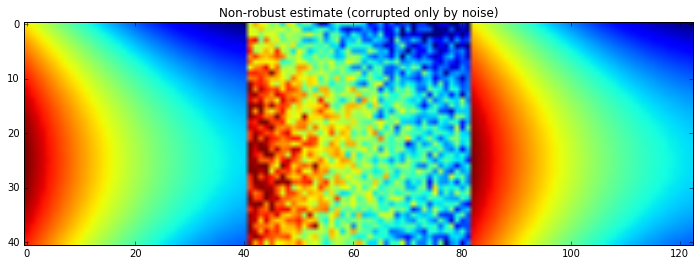

In [63]:
# non-robust least squares estimation
# X*A = Z

x_fl = x.flatten()
y_fl = y.flatten()
z_ones = np.ones([x.size,1])

x_fl2 = x_fl**2
y_fl2 = y_fl**2

v1 = np.reshape(x_fl2, ([len(x_fl2),1]))
v2 = np.reshape(y_fl2, ([len(y_fl2),1]))
v3 = np.reshape(x_fl, ([len(x_fl),1]))
v4 = np.reshape(y_fl, ([len(y_fl),1]))

X = np.hstack((v1, v2, v3, v4, z_ones))

Z = np.zeros(z_noise.shape)
Z[:] = z_noise

Z_fl = Z.flatten()
print 'zfl: ', Z_fl
Z = np.reshape(Z_fl, ([len(Z_fl), 1]))  # make it column vector

A_lsq = np.linalg.lstsq(X, Z)[0]

z_least_squares = np.dot(X, A_lsq)
z_least_squares = np.reshape(z_least_squares, z.shape)

lsq_non_robust_noise = np.hstack((z, z_noise, z_least_squares))

plt.figure(figsize=(12, 12))
plt.title('Non-robust estimate (corrupted only by noise)')
plt.imshow(lsq_non_robust_noise)
plt.clim(z.min(), z.max())

plt.show()

x size 1681
[1603 1550 1645 ... 1574 1284  591]
504.0


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:27: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


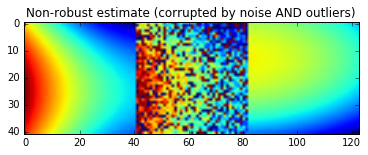

In [64]:
############################################################
# CASE 2: data is corrupted by gaussian noise AND outliers #
#         Regular linear least squares method is used      #
############################################################

# create outliers
outlier_prop = 0.3
print 'x size', x.size
outlier_IND = np.random.permutation(x.size)
print outlier_IND
print np.floor(x.size * outlier_prop)
outlier_IND = outlier_IND[0:int(np.floor(x.size * outlier_prop))]

z_noise_outlier = np.zeros(z_noise.shape)
z_noise_outlier[:] = z_noise
z_noise_outlier_flt = z_noise_outlier.flatten()

z_noise_outlier_flt[outlier_IND] = z_noise_outlier_flt[outlier_IND] + \
    10*np.random.standard_normal(z_noise_outlier_flt[outlier_IND].shape)
z_noise_outlier = np.reshape(z_noise_outlier_flt, z.shape)

# non-robust least squares estimation
Z = np.zeros(z_noise_outlier.shape)
Z[:] = z_noise_outlier
Z_fl = Z.flatten()
Z = np.reshape(Z_fl, ([len(Z_fl), 1]))

A_lsq_outlier = np.linalg.lstsq(X, Z)[0]

z_lsq_outlier = np.dot(X, A_lsq_outlier)
z_lsq_outlier = np.reshape(z_lsq_outlier, z.shape)

lsq_non_robust_outlier = np.hstack((z, z_noise_outlier, z_lsq_outlier))

plt.figure()
plt.title('Non-robust estimate (corrupted by noise AND outliers)')
plt.imshow(lsq_non_robust_outlier)
plt.clim(z.min(), z.max())

plt.show()

[[ 0.10150367]
 [-0.20023752]
 [-0.28778795]
 [ 0.08743676]
 [ 0.14952269]]
[[ 0.09930246]
 [-0.1971947 ]
 [-0.29549313]
 [ 0.09702731]
 [ 0.15030899]]
[[ 0.0991664 ]
 [-0.19702301]
 [-0.29607298]
 [ 0.09782472]
 [ 0.15041812]]
[[ 0.09915491]
 [-0.1970072 ]
 [-0.29611451]
 [ 0.097894  ]
 [ 0.1504286 ]]
[[ 0.09915298]
 [-0.19700231]
 [-0.29611696]
 [ 0.09790168]
 [ 0.15042857]]
[[ 0.09915287]
 [-0.19700209]
 [-0.29611714]
 [ 0.09790225]
 [ 0.15042865]]
[[ 0.09915287]
 [-0.19700209]
 [-0.29611715]
 [ 0.09790229]
 [ 0.15042866]]
[[ 0.09915287]
 [-0.19700209]
 [-0.29611715]
 [ 0.09790229]
 [ 0.15042866]]
[[ 0.09915287]
 [-0.19700209]
 [-0.29611715]
 [ 0.09790229]
 [ 0.15042866]]
[[ 0.09915287]
 [-0.19700209]
 [-0.29611715]
 [ 0.09790229]
 [ 0.15042866]]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:52: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


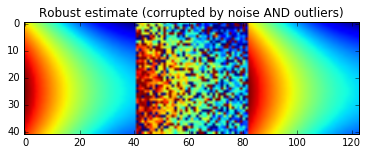

In [65]:
############################################################
# CASE 3: data is corrupted by gaussian noise AND outliers #
#         Robust least squares method is used              #
############################################################

# code provided by: https://salzis.wordpress.com/2012/10/01/robust-least-squares-for-fitting-data/

# robust least sqaures (starting with the least squares solution)
A_robust = A_lsq_outlier
n_robust_it = 10

# iterate till the fit converges
for robust_it in range(n_robust_it):

    # compute absolute value of residuals (fit minus data)
    # Z is corrupted by outliers and noise
    abs_resid = abs(np.dot(X, A_robust) - Z)

    # compute the scaling factor for the standardization of residuals
    # using the median absolute deviation of the residuals
    # 6.9460 is a tuning constant (4.685/0.6745)
#     print abs_resid
    abs_res_scale = 6.9460 * np.median(abs_resid)

    # standardize residuals
    w = abs_resid / abs_res_scale
#     print w

    # compute the robust bisquare weights excluding outliers
    outliers = (w > 1)*1
#     print outliers.nonzero()
    w[outliers.nonzero()] = 0
#     print w

    good_values = (w != 0)*1
#     print good_values.nonzero()[0].shape
    # calculate robust weights for 'good' points
    # Note that if you supply your own regression weight vector,
    # the final weight is the product of the robust weight and the regression weight.
    tmp = 1 - np.power(w[good_values.nonzero()], 2)
    w[good_values.nonzero()] = np.power(tmp, 2)
#     print X
    # get weighted X'es // after tile, the weights are applied to all columns of X
    XW = np.tile(w, (1, 5)) * X
#     print XW.T

    a = np.dot(XW.T, X)
#     print a
    b = np.dot(XW.T, Z)

    # get the least-squares solution to a linear matrix equation
    A_robust = np.linalg.lstsq(a, b)[0]
    # update A_robust with   argmin(|| A*(XT*WT)*X - (XT*WT)*Z ||)
    
    print A_robust

    z_robust = np.dot(X, A_robust)
    z_robust = np.reshape(z_robust, z.shape)

lsq_robust = np.hstack((z, z_noise_outlier, z_robust))

plt.figure()
plt.title('Robust estimate (corrupted by noise AND outliers)')
plt.imshow(lsq_robust)
plt.clim(z.min(), z.max())

plt.show()

In [69]:
import numpy as np
from scipy.optimize import leastsq, minimize

def get_spot_grid(shape, pitch, center_x, center_y, rotation=0):
    x_spots, y_spots = np.meshgrid(
             (np.arange(shape[1]) - (shape[1]-1)/2.)*pitch, 
             (np.arange(shape[0]) - (shape[0]-1)/2.)*pitch)
    theta = rotation/180.*np.pi
    x_spots = x_spots*np.cos(theta) - y_spots*np.sin(theta) + center_x
    y_spots = x_spots*np.sin(theta) + y_spots*np.cos(theta) + center_y
    return x_spots, y_spots


def get_mean_distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2).mean()


def err_func(params, xe, ye):
    pitch, center_x, center_y, rotation = params
    x_grid, y_grid = get_spot_grid(xe.shape, pitch, center_x, center_y, rotation)
    return get_mean_distance(x_grid, y_grid, xe, ye)

xe = np.array([-23.31,  -4.01,  15.44,  34.71, -23.39,  -4.10,  15.28,  34.60, -23.75,  -4.38,  15.07,  34.34, -23.91,  -4.53,  14.82,  34.15]).reshape(4, 4)
ye = np.array([-16.00, -15.81, -15.72, -15.49,   3.29,   3.51,   3.90,   4.02,  22.75,  22.93,  23.18,  23.43,  42.19,  42.35,  42.69,  42.87]).reshape(4, 4)

# leastsq(err_func, x0=(19, 12, 5, 0), args=(xe, ye))
a = minimize(err_func, x0=(19, 12, 5, 0), args=(xe, ye))
print a

# visualize
xn = np.linspace(xe.min(), xe.max(), 100)
yn = np.linspace(ye.min(), ye.max(), 100)
x_g, y_g = np.meshgrid(xn, yn)





      fun: 0.08149505856946193
 hess_inv: array([[ 0.03779064,  0.00294304, -0.00996572, -0.02539804],
       [ 0.00294304,  0.17893675,  0.04148949, -0.10629477],
       [-0.00996572,  0.04148949,  0.06093391,  0.02095348],
       [-0.02539804, -0.10629477,  0.02095348,  0.22527292]])
      jac: array([-2.02842057e-06,  1.99675560e-06, -4.62867320e-06,  3.16649675e-07])
  message: 'Optimization terminated successfully.'
     nfev: 186
      nit: 21
     njev: 31
   status: 0
  success: True
        x: array([19.38277721,  5.43879479, 13.32635516,  0.62994045])
